## Decision Tree Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
tnc = pd.read_csv("titanic.csv")

In [3]:
tnc.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
tnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###  Preprocessing

In [5]:
tnc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
ttnc = tnc[["PassengerId","Pclass","SibSp","Parch","Fare"]]
ttnc

,PassengerId,Pclass,SibSp,Parch,Fare
0,1,3,1,0,7.2500
1,2,1,1,0,71.2833
2,3,3,0,0,7.9250
3,4,1,1,0,53.1000
4,5,3,0,0,8.0500
...,...,...,...,...,...
886,887,2,0,0,13.0000
887,888,1,0,0,30.0000
888,889,3,1,2,23.4500
889,890,1,0,0,30.0000


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
le.fit_transform(tnc["Sex"])
ttnc["Sex_enc"] = le.fit_transform(tnc["Sex"])
le.fit_transform(tnc["Ticket"])
ttnc["Ticket_enc"] = le.fit_transform(tnc["Ticket"])

In [9]:
ttnc["survived"] = tnc["Survived"]

In [10]:
ttnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Sex_enc      891 non-null    int32  
 6   Ticket_enc   891 non-null    int32  
 7   survived     891 non-null    int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 48.9 KB


In [11]:
ttnc.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           0
Sex_enc        0
Ticket_enc     0
survived       0
dtype: int64

### Spliting

In [12]:
X = ttnc.iloc[:,:-1]
y = ttnc.iloc[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [14]:
def train_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    
    return model

## Baseline model

In [15]:
log = LogisticRegression()

In [16]:
train_model(log)

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       153
           1       0.77      0.63      0.70       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Decision Tree 

In [17]:
dt1 = DecisionTreeClassifier()

In [18]:
dt1 = train_model(dt1)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       153
           1       0.80      0.70      0.74       115

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.79      0.79       268



In [19]:
dt1.feature_importances_

array([0.17493073, 0.10549672, 0.00965684, 0.03698208, 0.13283667,
       0.32100818, 0.21908878])

In [20]:
print(ttnc.columns.tolist())

['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_enc', 'Ticket_enc', 'survived']


In [21]:
from sklearn import tree

[Text(142.07864815848214, 211.4, 'X[5] <= 0.5\ngini = 0.463\nsamples = 623\nvalue = [396, 227]'),
 Text(38.39363839285714, 199.32, 'X[1] <= 2.5\ngini = 0.387\nsamples = 217\nvalue = [57, 160]'),
 Text(20.925, 187.24, 'X[4] <= 28.856\ngini = 0.097\nsamples = 117\nvalue = [6, 111]'),
 Text(14.946428571428571, 175.16, 'X[4] <= 28.231\ngini = 0.201\nsamples = 44\nvalue = [5, 39]'),
 Text(11.957142857142857, 163.07999999999998, 'X[6] <= 167.5\ngini = 0.169\nsamples = 43\nvalue = [4, 39]'),
 Text(8.967857142857143, 151.0, 'X[6] <= 130.5\ngini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(5.978571428571429, 138.92000000000002, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(11.957142857142857, 138.92000000000002, 'X[6] <= 135.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(8.967857142857143, 126.84, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(14.946428571428571, 126.84, 'X[6] <= 166.0\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(11.957142857142857, 114.75999999999999,

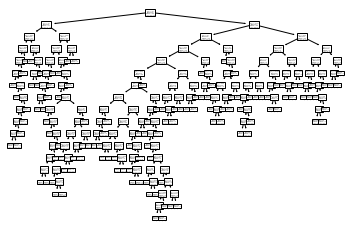

In [22]:
tree.plot_tree(dt1)

In [23]:
dt1.get_depth()

17

In [24]:
dt2 = DecisionTreeClassifier(max_depth = 12)

In [25]:
train_model(dt2)

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       153
           1       0.81      0.70      0.75       115

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
dt3 = DecisionTreeClassifier(min_samples_leaf = 35)
train_model(dt3)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       153
           1       0.75      0.64      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
dt4 = DecisionTreeClassifier(criterion = 'entropy')
train_model(dt4)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       153
           1       0.75      0.64      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')